In [15]:
import pandas as pd
import matplotlib.pyplot as plt

f1season2018 = '/content/drive/My Drive/F1 Datascience/formula1_2018season_RaceResults.csv'
f1season2019 = '/content/drive/My Drive/F1 Datascience/formula1_2019season_raceResults.csv'
f1season2020 = '/content/drive/My Drive/F1 Datascience/formula1_2020season_raceResults.csv'
f1season2021 = '/content/drive/My Drive/F1 Datascience/formula1_2021season_raceResults.csv'
f1season2022 = '/content/drive/My Drive/F1 Datascience/formula1_2022season_raceResults.csv'
f1season2023 = '/content/drive/My Drive/F1 Datascience/formula1_2023season_raceResults.csv'

f1season2018df = pd.read_csv(f1season2018).assign(Season="2018")
f1season2019df = pd.read_csv(f1season2019).assign(Season="2019")
f1season2020df = pd.read_csv(f1season2020).assign(Season="2020")
f1season2021df = pd.read_csv(f1season2021).assign(Season="2021")
f1season2022df = pd.read_csv(f1season2022).assign(Season="2022")
f1season2023df = pd.read_csv(f1season2023).assign(Season="2023")

print(f1season2018df.head())
print(f1season2019df.head())
print(f1season2020df.head())
print(f1season2021df.head())
print(f1season2022df.head())
print(f1season2023df.head())



       Track Position  No            Driver                       Team  \
0  Australia        1   5  Sebastian Vettel                    Ferrari   
1  Australia        2  44    Lewis Hamilton                   Mercedes   
2  Australia        3   7    Kimi Raikkönen                    Ferrari   
3  Australia        4   3  Daniel Ricciardo  Red Bull Racing Tag Heuer   
4  Australia        5  14   Fernando Alonso            McLaren Renault   

   Starting Grid  Laps Time/Retired  Points Fastest Lap Season  
0              3    58  1:29:33.283      25    1:26.469   2018  
1              1    58       +5.036      18    1:26.444   2018  
2              2    58       +6.309      15    1:26.373   2018  
3              8    58       +7.069      12    1:25.945   2018  
4             10    58      +27.886      10    1:26.978   2018  
       Track Position  No            Driver                   Team  \
0  Australia        1  77   Valtteri Bottas               Mercedes   
1  Australia        2  44

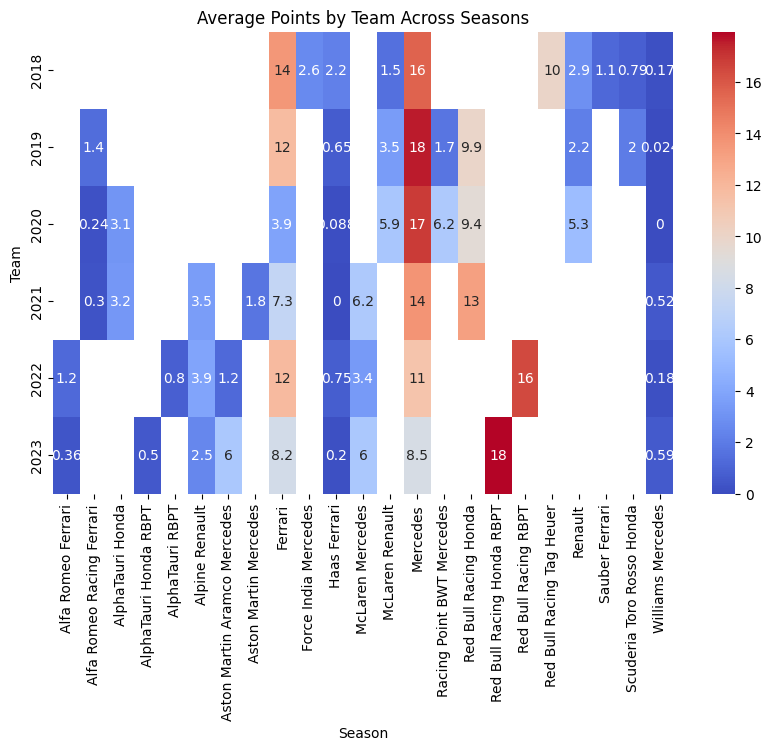

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combining datasets
all_seasons_df = pd.concat([f1season2018df, f1season2019df, f1season2020df, f1season2021df, f1season2022df, f1season2023df], ignore_index=True)

team_performance = all_seasons_df.groupby(['Season', 'Team'])['Points'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(team_performance, annot=True, cmap='coolwarm')
plt.title('Average Points by Team Across Seasons')
plt.ylabel('Team')
plt.xlabel('Season')
plt.show()


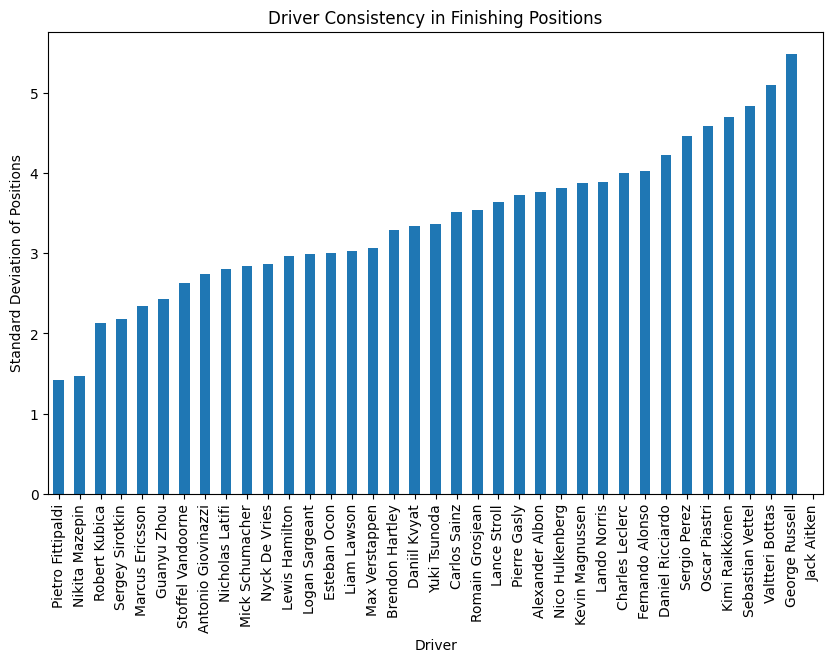

In [22]:

all_seasons_df['Position'] = pd.to_numeric(all_seasons_df['Position'], errors='coerce')
driver_consistency = all_seasons_df.groupby('Driver')['Position'].std().sort_values()

plt.figure(figsize=(10, 6))
driver_consistency.plot(kind='bar')
plt.title('Driver Consistency in Finishing Positions')
plt.xlabel('Driver')
plt.ylabel('Standard Deviation of Positions')
plt.show()


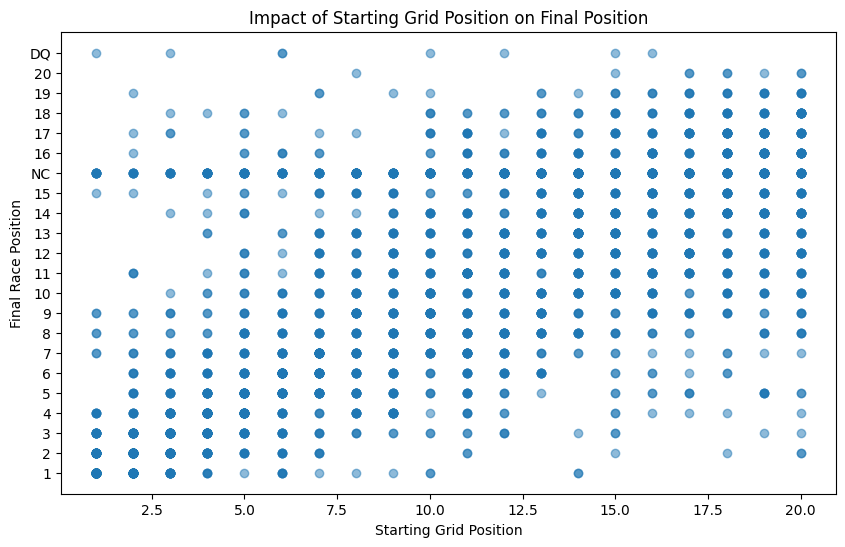

In [18]:

plt.figure(figsize=(10, 6))
plt.scatter(all_seasons_df['Starting Grid'], all_seasons_df['Position'], alpha=0.5)
plt.title('Impact of Starting Grid Position on Final Position')
plt.xlabel('Starting Grid Position')
plt.ylabel('Final Race Position')
plt.show()


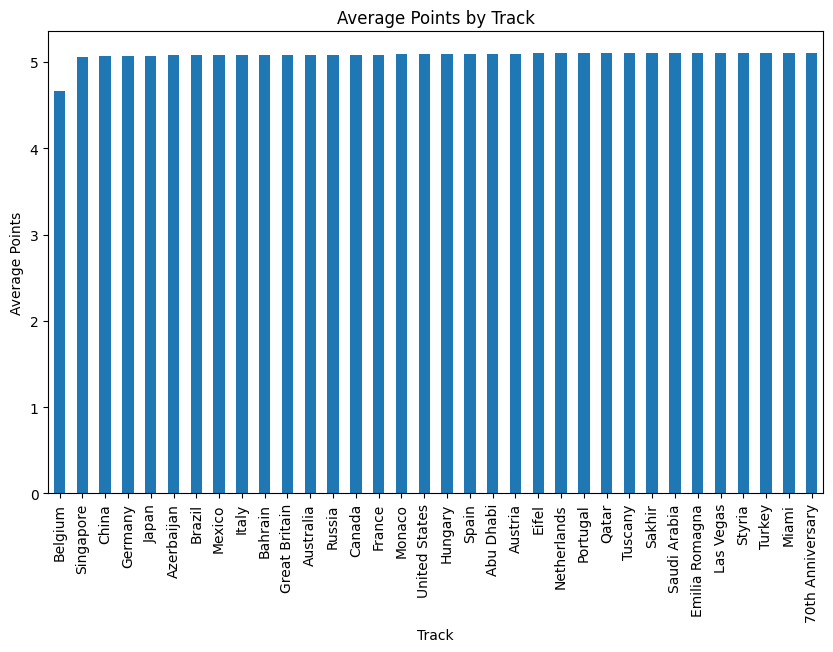

In [19]:

track_influence = all_seasons_df.groupby('Track')['Points'].mean().sort_values()

plt.figure(figsize=(10, 6))
track_influence.plot(kind='bar')
plt.title('Average Points by Track')
plt.xlabel('Track')
plt.ylabel('Average Points')
plt.show()


<Figure size 1000x600 with 0 Axes>

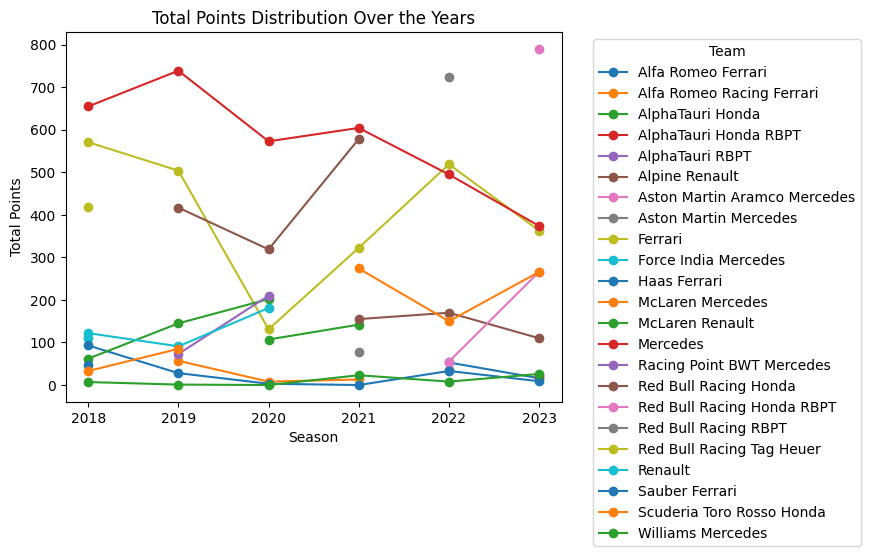

In [20]:

points_distribution = all_seasons_df.groupby(['Season', 'Team'])['Points'].sum().unstack()

plt.figure(figsize=(10, 6))
points_distribution.plot(marker='o')
plt.title('Total Points Distribution Over the Years')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
